In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
from PIL import Image

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
input_layer = Input(shape=(28,28), name='input')
flat = Flatten()(input_layer)
l1=Dense(400,activation="relu", name='l1')(flat)
l2=Dense(200,activation="relu", name='l2')(l1)
l3=Dense(100,activation="relu", name='l3')(l2)
l4=Dense(50,activation="relu", name='l4')(l3)
out_layer=Dense(10,activation="softmax", name='l5')(l4)

In [6]:
model = Model(inputs=[input_layer], outputs=[out_layer])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
l1 (Dense)                   (None, 400)               314000    
_________________________________________________________________
l2 (Dense)                   (None, 200)               80200     
_________________________________________________________________
l3 (Dense)                   (None, 100)               20100     
_________________________________________________________________
l4 (Dense)                   (None, 50)                5050      
_________________________________________________________________
l5 (Dense)                   (None, 10)                510   

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
y_hot_train = OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()
y_hot_test = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [10]:
model.fit(x_train, y_hot_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 10s 169us/sample - loss: 0.7067 - accuracy: 0.8987
Epoch 2/8
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1845 - accuracy: 0.9483
Epoch 3/8
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1407 - accuracy: 0.9593
Epoch 4/8
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1241 - accuracy: 0.9648
Epoch 5/8
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1077 - accuracy: 0.9701
Epoch 6/8
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0897 - accuracy: 0.9757
Epoch 7/8
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0812 - accuracy: 0.9778
Epoch 8/8
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0731 - accuracy: 0.9805


In [12]:
model.fit(x_test, y_hot_test, epochs=8)

Train on 10000 samples
Epoch 1/8
10000/10000 [==============================] - 2s 165us/sample - loss: 0.1021 - accuracy: 0.9715
Epoch 2/8
10000/10000 [==============================] - 1s 142us/sample - loss: 0.0628 - accuracy: 0.9825
Epoch 3/8
10000/10000 [==============================] - 1s 130us/sample - loss: 0.0378 - accuracy: 0.9898
Epoch 4/8
10000/10000 [==============================] - 1s 130us/sample - loss: 0.0331 - accuracy: 0.9895
Epoch 5/8
10000/10000 [==============================] - 1s 128us/sample - loss: 0.0280 - accuracy: 0.9914
Epoch 6/8
10000/10000 [==============================] - 1s 148us/sample - loss: 0.0167 - accuracy: 0.9944
Epoch 7/8
10000/10000 [==============================] - 1s 127us/sample - loss: 0.0271 - accuracy: 0.9919
Epoch 8/8
10000/10000 [==============================] - 1s 131us/sample - loss: 0.0359 - accuracy: 0.9914


array([[6, 0, 4, 2, 7, 1, 5, 9, 8, 3]], dtype=int64)

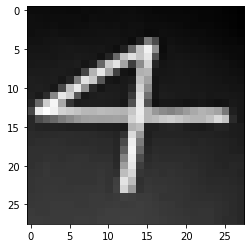

In [30]:
img = Image.open('../datasets/nums/four.jpeg')

img = img.resize(size=(28, 28))
new = 255 - np.array(img).mean(axis=2)
plt.imshow(new, cmap='gray')
# np.array([new]).shape
model.predict(np.array([new])).argsort()

In [13]:
model.test_on_batch(x_test, y_hot_test)

[0.026951812, 0.9923]

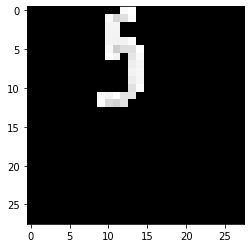

In [14]:
sample  = np.load('image.npy')

plt.imshow(sample, cmap='gray')

In [15]:
model.predict(np.array([sample])).argmax()

3

In [16]:
model.save('model.h5')